In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

#!wget --no-check-certificate \
#    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#    -O "/tmp/cats-and-dogs.zip"



In [3]:
root = r"D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF"

In [4]:
local_zip = root + '\\tmp\cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(root + '\\tmp')
zip_ref.close()


In [6]:
print(len(os.listdir(root + '/tmp/PetImages/Cat/')))
print(len(os.listdir(root + '/tmp/PetImages/Dog/')))

12501
12501


In [41]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
import glob
try:
    cats_v_dogs = root + '/tmp/cats-v-dogs'
    cats_v_dogs_train = cats_v_dogs + '/training'
    cats_v_dogs_test = cats_v_dogs + '/testing'
    cats_v_dogs_train_cats = cats_v_dogs_train + '/cats'
    cats_v_dogs_train_dogs = cats_v_dogs_train + '/dogs'
    cats_v_dogs_test_cats = cats_v_dogs_test + '/cats'
    cats_v_dogs_test_dogs = cats_v_dogs_test + '/dogs'

    folders = [cats_v_dogs, cats_v_dogs_train, cats_v_dogs_test, cats_v_dogs_train_cats, cats_v_dogs_train_dogs, cats_v_dogs_test_cats, cats_v_dogs_test_dogs]

    for folder in folders:
        if os.path.exists(folder):
            print(folder + ' Exists')
        else:
            os.mkdir(folder)
 
    folders_to_clean = [cats_v_dogs_train_cats, cats_v_dogs_train_dogs, cats_v_dogs_test_cats, cats_v_dogs_test_dogs]

    for folder in folders_to_clean:
        files = glob.glob(folder + '/*')
        for f in files:
            os.remove(f)
    
except OSError:
    pass

D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/training Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/testing Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/training/cats Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/training/dogs Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/testing/cats Exists
D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course2_CNN_in_TF/tmp/cats-v-dogs/testing/dogs Exists


In [42]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    orig_list = os.listdir(SOURCE)
    valid_list = []
    for item in orig_list:
      itempath = SOURCE + item
      if os.path.getsize(itempath):
        valid_list.append(item)
      else:
        print(item + ' is zero length, so ignoring')
    numfiles = len(valid_list)
    numtrainfiles = int(numfiles * SPLIT_SIZE)
    shuffled_list = random.sample(valid_list, len(valid_list))

    for item in shuffled_list[:numtrainfiles]:
        copyfile(SOURCE + item, TRAINING + item)

    for item in shuffled_list[numtrainfiles:]:
        copyfile(SOURCE + item, TESTING + item)
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = root + "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = root + "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = root + "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = root + "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = root + "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = root + "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [43]:
print(len(os.listdir(root + '/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir(root + '/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir(root + '/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir(root + '/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [47]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  

])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
TRAINING_DIR = root + '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = root + '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [49]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
144/225 [==================>...........] - ETA: 4:15 - loss: 0.7402 - accuracy: 0.5856

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 966s 4s/step - loss: 0.6889 - accuracy: 0.6191 - val_loss: 0.5496 - val_accuracy: 0.7000
Epoch 2/15
 19/225 [=>............................] - ETA: 5:40 - loss: 0.5893 - accuracy: 0.6900

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 537s 2s/step - loss: 0.5223 - accuracy: 0.7364 - val_loss: 0.4923 - val_accuracy: 0.7576
Epoch 3/15
105/225 [=============>................] - ETA: 3:19 - loss: 0.4455 - accuracy: 0.7955

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 403s 2s/step - loss: 0.4386 - accuracy: 0.7966 - val_loss: 0.4604 - val_accuracy: 0.7832
Epoch 4/15
153/225 [===================>..........] - ETA: 1:59 - loss: 0.3841 - accuracy: 0.8285

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 413s 2s/step - loss: 0.3812 - accuracy: 0.8307 - val_loss: 0.3998 - val_accuracy: 0.8160
Epoch 5/15
 31/225 [===>..........................] - ETA: 5:19 - loss: 0.3217 - accuracy: 0.8603

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 398s 2s/step - loss: 0.3181 - accuracy: 0.8619 - val_loss: 0.3941 - val_accuracy: 0.8232
Epoch 6/15
161/225 [====================>.........] - ETA: 1:44 - loss: 0.2526 - accuracy: 0.8935

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

224/225 [============================>.] - ETA: 1s - loss: 0.2487 - accuracy: 0.8947

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 380s 2s/step - loss: 0.2485 - accuracy: 0.8949 - val_loss: 0.4100 - val_accuracy: 0.8252
Epoch 7/15
225/225 [==============================] - 700s 3s/step - loss: 0.1848 - accuracy: 0.9265 - val_loss: 0.4666 - val_accuracy: 0.8132
Epoch 8/15
210/225 [===========================>..] - ETA: 23s - loss: 0.1245 - accuracy: 0.9538

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 363s 2s/step - loss: 0.1241 - accuracy: 0.9541 - val_loss: 0.7977 - val_accuracy: 0.7748
Epoch 9/15
  5/225 [..............................] - ETA: 5:34 - loss: 0.1124 - accuracy: 0.9500

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 390s 2s/step - loss: 0.0862 - accuracy: 0.9699 - val_loss: 0.7154 - val_accuracy: 0.8016
Epoch 10/15
 54/225 [======>.......................] - ETA: 4:36 - loss: 0.0681 - accuracy: 0.9815

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 377s 2s/step - loss: 0.0567 - accuracy: 0.9829 - val_loss: 0.7191 - val_accuracy: 0.8368
Epoch 11/15
  7/225 [..............................] - ETA: 5:55 - loss: 0.0321 - accuracy: 0.9914

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 380s 2s/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.7182 - val_accuracy: 0.8224
Epoch 12/15
 21/225 [=>............................] - ETA: 5:32 - loss: 0.0070 - accuracy: 0.9990

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 380s 2s/step - loss: 0.0577 - accuracy: 0.9859 - val_loss: 0.8450 - val_accuracy: 0.8256
Epoch 13/15
 14/225 [>.............................] - ETA: 5:41 - loss: 0.0173 - accuracy: 0.9950

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 378s 2s/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.8384 - val_accuracy: 0.8352
Epoch 14/15
126/225 [===============>..............] - ETA: 2:41 - loss: 0.0538 - accuracy: 0.9847

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 379s 2s/step - loss: 0.0450 - accuracy: 0.9876 - val_loss: 0.9095 - val_accuracy: 0.8232
Epoch 15/15
203/225 [==========================>...] - ETA: 35s - loss: 0.0542 - accuracy: 0.9854

c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
c:\users\owner\my-venv\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 byte

225/225 [==============================] - 379s 2s/step - loss: 0.0494 - accuracy: 0.9867 - val_loss: 0.9484 - val_accuracy: 0.8304


Text(0.5, 1.0, 'Training and validation loss')

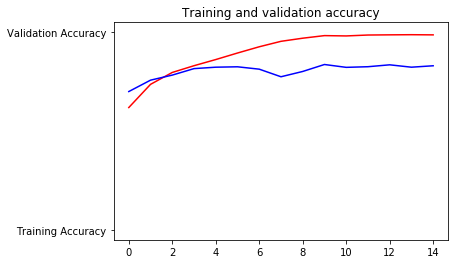

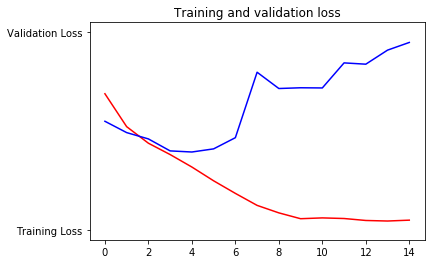

In [52]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")